In [1]:
 %matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

#### Get Data from pickle object

In [2]:
dfWithG=pd.read_pickle('data/dataframe.pkl')


#### Size the data

In [3]:
dfWithG.groupby(['year','quarter']).size()

year  quarter
2010  1          243071
      2          764464
      3          771469
      4          740719
2011  1          710594
      2          700031
      3          685909
      4          653172
2012  1          611617
      2          570463
      3          533066
      4          490879
2013  1          449137
      2          410157
      3          377198
      4          358845
2014  1          347136
dtype: int64

In [4]:
dfWithG.head()

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,REMAINING MONTHS TO LEGAL MATURITY,REPURCHASE FLAG,MODIFICATION FLAG,ZERO BALANCE CODE,CURRENT INTEREST RATE,CURRENT DEFERRED UPB,year,quarter,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,MORTGAGE INSURANCE PERCENTAGE,CLTV,DTI Ratio,change-current,change-chained
0,F110Q1000001,2010-02-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,777,N,000,43.0,26.0,3.0,1.6
1,F110Q1000001,2010-03-01,0.0,0,359,F,N,00,4.875,0.0,2010,1,777,N,000,43.0,26.0,3.0,1.6
2,F110Q1000003,2010-02-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,727,N,000,61.0,26.0,3.0,1.6
3,F110Q1000003,2010-03-01,0.0,0,359,F,N,00,4.875,0.0,2010,1,727,N,000,61.0,26.0,3.0,1.6
4,F110Q1000004,2010-03-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,794,N,000,58.0,31.0,3.0,1.6


#### Relation between CREDIT SCORE  and CURRENT INTEREST RATE

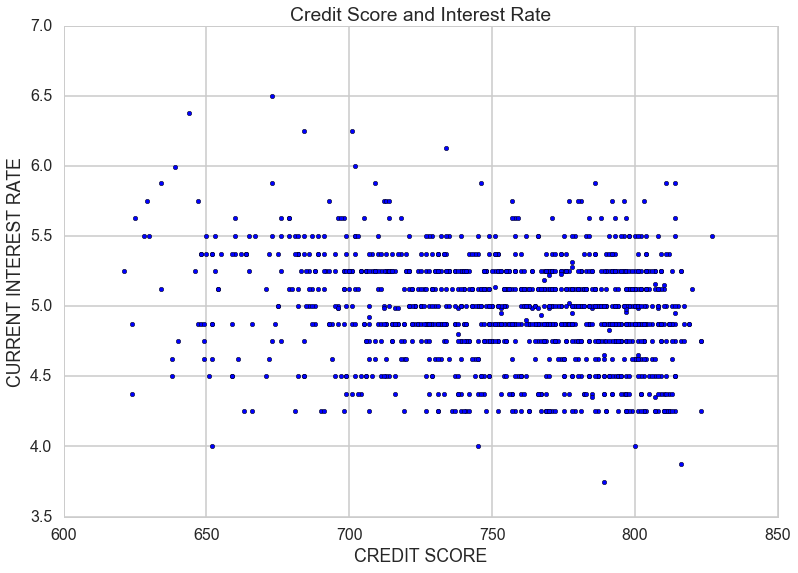

In [5]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CURRENT INTEREST RATE','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
df3=df3.sample(frac=0.01)
plt.scatter(df3['CREDIT SCORE'],df3['CURRENT INTEREST RATE'])
plt.xlabel('CREDIT SCORE')
plt.ylabel('CURRENT INTEREST RATE')
plt.title('Credit Score and Interest Rate')
plt.xlim(400,850)
plt.autoscale()

#### Relation between CREDIT SCORE  and LOAN TO VALUE Ratio

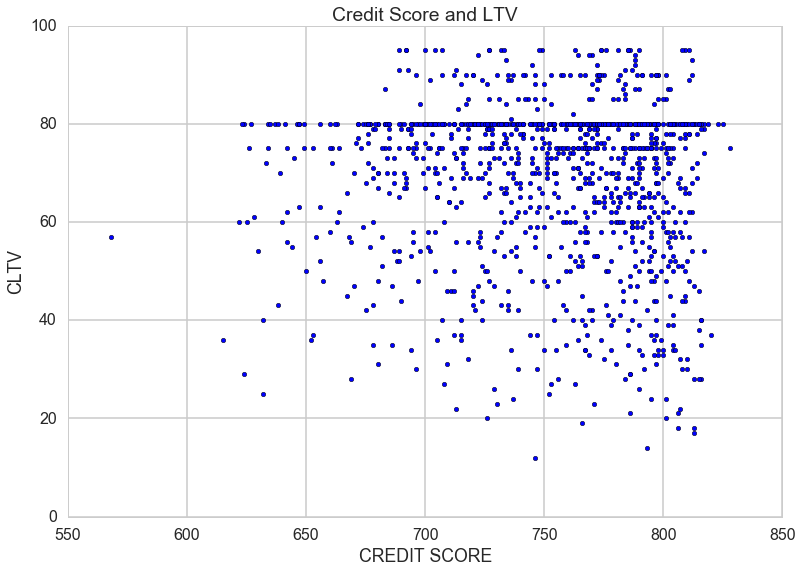

In [6]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CLTV','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
df3=df3.sample(frac=0.01)
plt.scatter(df3['CREDIT SCORE'],df3['CLTV'])
plt.xlabel('CREDIT SCORE')
plt.ylabel('CLTV')
plt.title('Credit Score and LTV')
plt.xlim(400,850)
plt.autoscale()

#### Relation between CREDIT SCORE  and DEBT TO INCOME Ratio

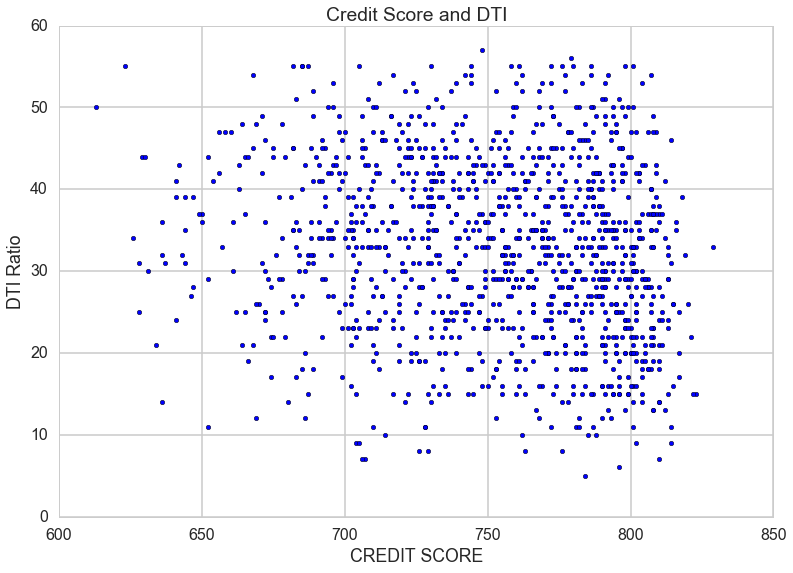

In [7]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','DTI Ratio','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
df3=df3.sample(frac=0.01)
plt.scatter(df3['CREDIT SCORE'],df3['DTI Ratio'])
plt.xlabel('CREDIT SCORE')
plt.ylabel('DTI Ratio')
plt.title('Credit Score and DTI')
plt.xlim(400,850)
plt.autoscale()